Importing Libraries

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

Function to add salt and pepper noise in original image

In [47]:
def add_noise(image, percent):
    noisy_image = image.copy()
    height, width = noisy_image.shape
    noise_amount = int(height * width * (percent / 100))

    # adding salt noise
    for i in range(noise_amount):
        xcoord = random.randint(0, width - 1)
        ycoord = random.randint(0, height - 1)
        noisy_image[ycoord][xcoord] = 255
    # assing pepper noise
    for i in range(noise_amount):
        xcoord = random.randint(0, width - 1) 
        ycoord = random.randint(0, height - 1)
        noisy_image[ycoord][xcoord] = 0

    return noisy_image

Function for average filter

In [48]:
def avg_filter(image, kernel):
    filtered_image = np.zeros_like(image)
    height, width = image.shape

    mask = np.ones((kernel, kernel)) / (kernel ** 2)

    padding = kernel // 2
    starting_row = 0 + padding
    ending_row = height - padding
    starting_col = 0 + padding 
    ending_col = width - padding

    for row in range(starting_row, ending_row):
        for col in range(starting_col, ending_col):
            neighborhood = image[row - padding : row + padding + 1, col - padding : col + padding + 1]
            average_value = np.sum(neighborhood * mask)

            filtered_image[row][col] = average_value
    
    return filtered_image

Function for Median Filter

In [49]:
def median_filter(image, kernel):
    filtered_image = np.zeros_like(image)
    height, width = image.shape

    padding = kernel // 2

    starting_row = 0 + padding
    ending_row = height - padding
    starting_col = 0 + padding
    ending_col = width - padding

    for row in range(starting_row, ending_row):
        for col in range(starting_col, ending_col):
            neighborhood = image[row - padding : row + padding + 1, col - padding : col + padding + 1]
            median_value = np.median(neighborhood)
            filtered_image[row][col] = median_value

    return filtered_image

Function for calculation the PSNR (Peak Signal to Noise Ratio) value between original and noisy filtered image

In [50]:
def cal_PSNR(original_image, noisy_image):
    original_image, noisy_image = np.float64(original_image), np.float64(noisy_image)
    Imax = 255.0
    mse = np.mean((original_image - noisy_image) ** 2)
    PSNR_val = 20 * np.log10(Imax / np.sqrt(mse))

    return round(PSNR_val, 2)

Loading the original image

In [51]:
original_image = cv2.imread('./images/pcb.png', 0)
gray_image = cv2.resize(original_image, (512, 512))


PSNR calculation for noisy image

In [52]:
percent = 10
noisy_image = add_noise(gray_image, percent)

noisy_PSNR = cal_PSNR(gray_image, noisy_image)

Dispalying the original image and noisy image

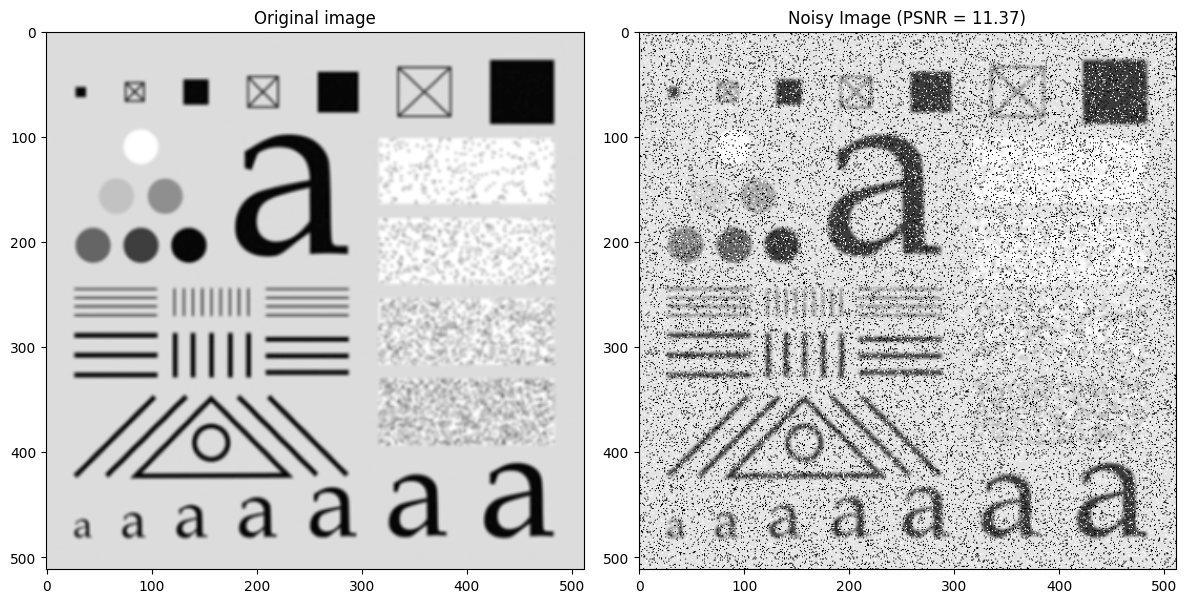

In [53]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f'Noisy Image (PSNR = {noisy_PSNR})')

plt.tight_layout()
plt.show()

PSNR calculation for average filtered image

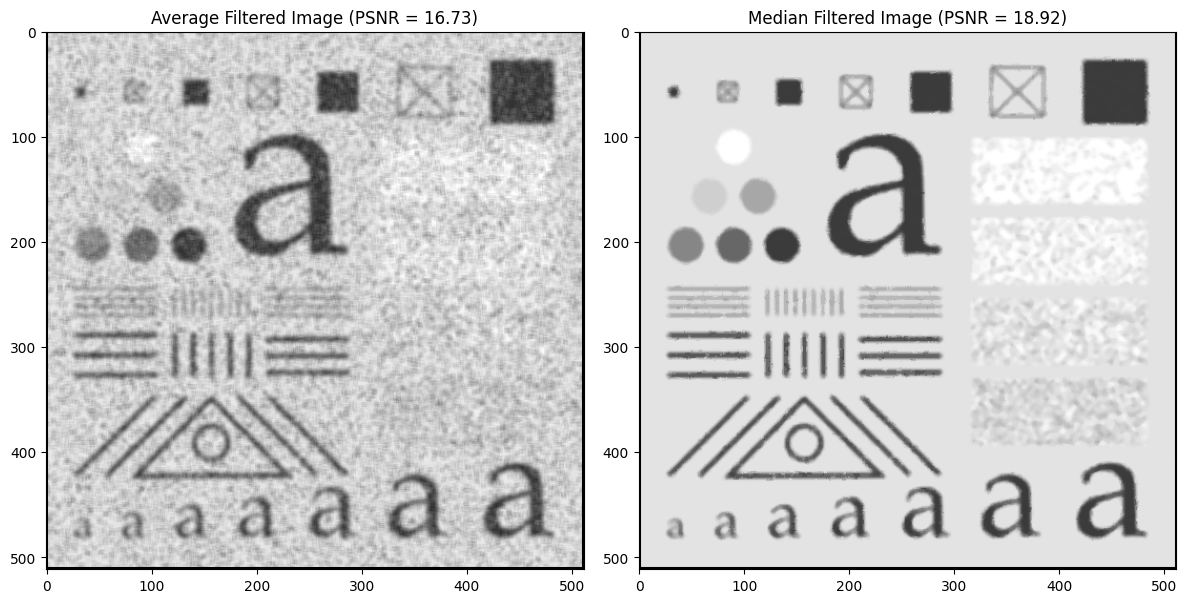

In [54]:
kernel_size = 5
avg_filtered_img = avg_filter(noisy_image, kernel_size)
avg_PSNR = cal_PSNR(gray_image, avg_filtered_img)

median_filtered_img = median_filter(noisy_image, kernel_size)
median_PSNR = cal_PSNR(gray_image, median_filtered_img)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(avg_filtered_img, cmap='gray')
plt.title(f'Average Filtered Image (PSNR = {avg_PSNR})')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered_img, cmap='gray')
plt.title(f'Median Filtered Image (PSNR = {median_PSNR})')

plt.tight_layout()
plt.show()